In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
Data = pd.read_csv("/kaggle/input/genre-music/music_genre_cleaned.csv")
#Data = pd.read_csv("/kaggle/input/new-data/new_data.csv")


In [3]:
Data.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,...,column_name_99,column_name_100,column_name_101,column_name_102,column_name_103,column_name_104,column_name_105,column_name_106,column_name_107,column_name_108
0,0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,...,0,0,0,0,0,0,0,0,0,0
1,1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,...,0,0,0,0,0,0,0,0,0,0
2,2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,...,0,0,0,0,0,0,0,0,0,0
3,3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,...,0,0,0,0,0,0,0,0,0,0
4,4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Data.shape


(50000, 124)

In [5]:
Data.head().T


,0,1,2,3,4
Unnamed: 0,0.00000,1.0000,2.00000,3.0000,4.00000
popularity,27.00000,31.0000,28.00000,34.0000,32.00000
acousticness,0.00468,0.0127,0.00306,0.0254,0.00465
danceability,0.65200,0.6220,0.62000,0.7740,0.63800
duration_ms,-1.00000,218293.0000,215613.00000,166875.0000,222369.00000
...,...,...,...,...,...
column_name_104,0.00000,0.0000,0.00000,0.0000,0.00000
column_name_105,0.00000,0.0000,0.00000,0.0000,0.00000
column_name_106,0.00000,0.0000,0.00000,0.0000,0.00000
column_name_107,0.00000,0.0000,0.00000,0.0000,0.00000


In [183]:
genre_counts = Data.groupby('music_genre')['mode'].count()
genre_counts

music_genre
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: mode, dtype: int64

In [184]:
# Print the shape of the dataset (number of rows, number of columns)
print(Data.shape)
# Print some basic statistics about the dataset
print(Data.describe())


(50000, 124)
         Unnamed: 0    popularity  acousticness  danceability   duration_ms  \
count  50000.000000  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   25003.500000     44.220420      0.306383      0.558241  2.212526e+05   
std    14435.286793     15.542008      0.341340      0.178632  1.286720e+05   
min        0.000000      0.000000      0.000000      0.059600 -1.000000e+00   
25%    12504.750000     34.000000      0.020000      0.442000  1.748000e+05   
50%    25004.500000     45.000000      0.144000      0.568000  2.192810e+05   
75%    37504.250000     56.000000      0.552000      0.687000  2.686122e+05   
max    50004.000000     99.000000      0.996000      0.986000  4.830606e+06   

             energy  instrumentalness           key      liveness  \
count  50000.000000      50000.000000  50000.000000  50000.000000   
mean       0.599755          0.181601      5.354420      0.193896   
std        0.264559          0.325409      3.457225      0.161637   

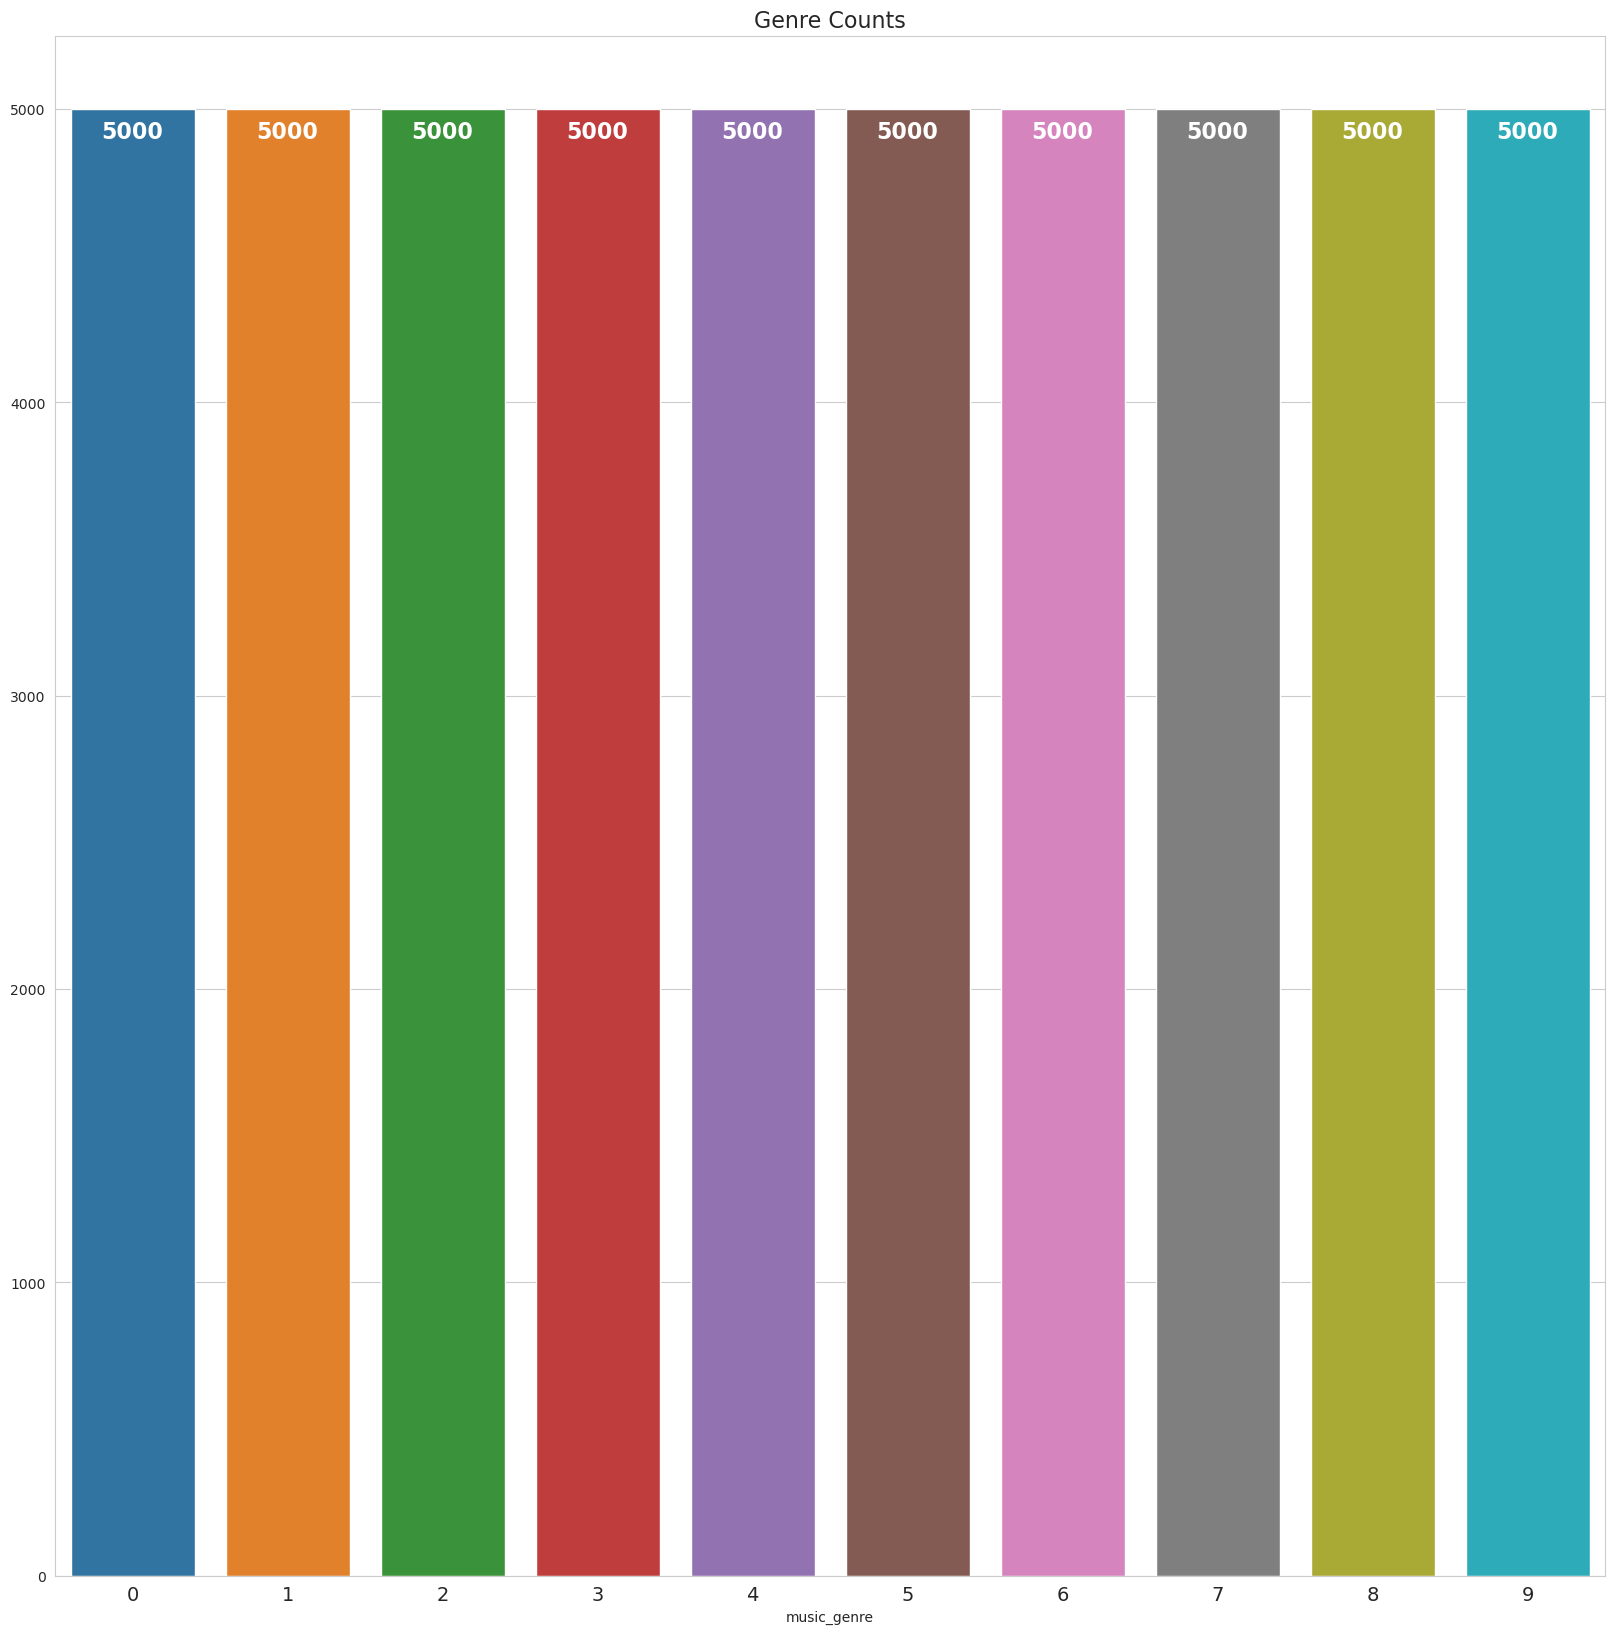

In [185]:
plt.figure(figsize=(20,20))
plt.title('Genre Counts', size=16)
plt.xticks(size=14)

g = sns.barplot(x=genre_counts.index, y=genre_counts.values);

for index, row in enumerate(genre_counts):
     g.text(index, row-100, row, color='white', ha="center", size='16', weight='bold')

plt.show()


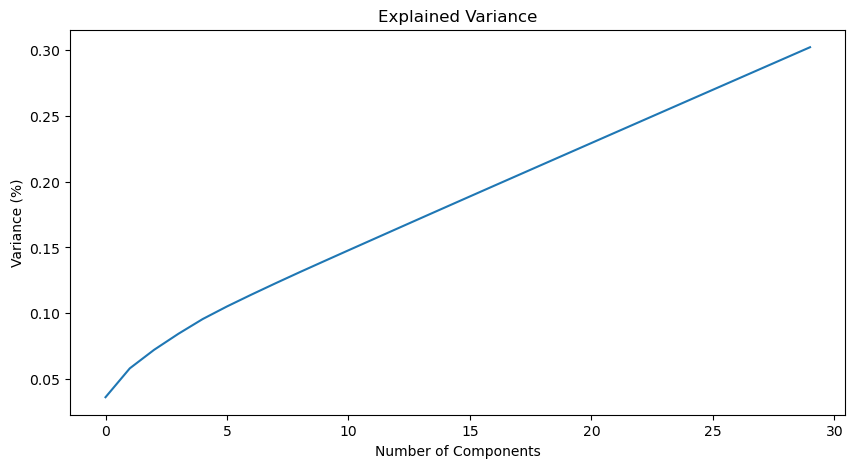

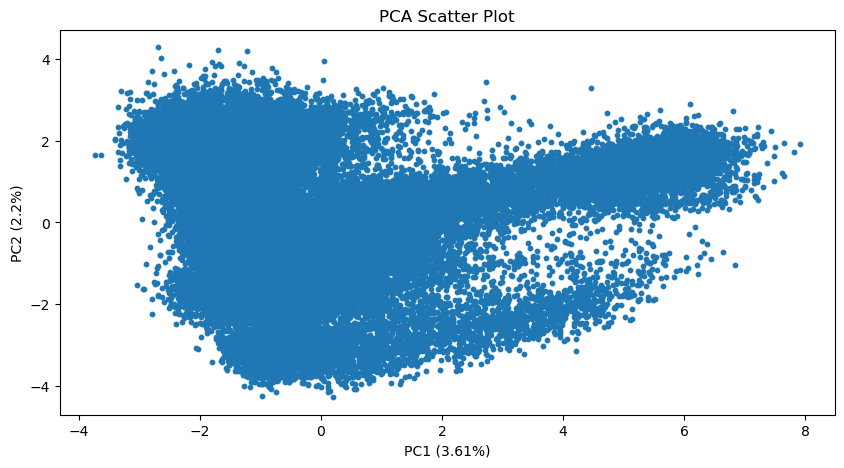

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Data_numeric = Data.select_dtypes(exclude=['object'])
ss = StandardScaler()
df_scaled = ss.fit_transform(Data_numeric.values)

pca = PCA(n_components=30)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')

plt.figure(figsize=(10,5))
plt.scatter(df_pca[:,0], df_pca[:,1], s=10)
plt.xlabel('PC1 ('+str(round(pca.explained_variance_ratio_[0]*100, 2))+'%)')
plt.ylabel('PC2 ('+str(round(pca.explained_variance_ratio_[1]*100, 2))+'%)')
plt.title('PCA Scatter Plot')
plt.show()

In [95]:
#pca = PCA(n_components=30)
#df_pca = pca.fit_transform(df_scaled)

loadings = pd.DataFrame(pca.components_, columns=Data_numeric.columns)
loadings = loadings.transpose()

print(loadings)

                        0         1         2
Unnamed: 0       0.043925 -0.467273 -0.379904
popularity      -0.260396 -0.349966 -0.006237
acousticness     0.375938 -0.147411  0.029680
danceability    -0.290575 -0.125129  0.216627
duration_ms      0.090758  0.023794  0.045820
...                   ...       ...       ...
column_name_104 -0.006847 -0.012562 -0.008114
column_name_105 -0.004020 -0.003852  0.004864
column_name_106 -0.000918  0.004292 -0.009089
column_name_107 -0.013017  0.014473 -0.032032
column_name_108 -0.012148 -0.016737  0.005687

[124 rows x 3 columns]


In [102]:
print(loadings[abs(loadings.iloc[:, 0])>0.2
              ])

                         0         1         2
popularity       -0.260396 -0.349966 -0.006237
acousticness      0.375938 -0.147411  0.029680
danceability     -0.290575 -0.125129  0.216627
energy           -0.377024  0.214817 -0.065790
instrumentalness  0.301917  0.066148  0.271155
loudness         -0.408435  0.161129 -0.041616
valence          -0.230410  0.037707 -0.067427
column_name_7     0.347515 -0.142002 -0.123083


In [97]:
print(loadings[abs(loadings.iloc[:, 0])>0.4])

                 0         1         2
loudness -0.408435  0.161129 -0.041616


In [91]:
import pandas as pd

# create a new dataframe with only the specified columns
df = Data[["popularity", "acousticness", "danceability", "energy", "instrumentalness", "loudness", "speechiness", "tempo", "valence", "music_genre", "column_name_7", "column_name_19" , "column_name_80" , "column_name_98",
          "column_name_0","column_name_1","column_name_8","column_name_9","column_name_11","column_name_94"]]

# preview the new dataframe
print(df.head())


   popularity  acousticness  danceability  energy  instrumentalness  loudness  \
0        27.0       0.00468         0.652   0.941           0.79200    -5.201   
1        31.0       0.01270         0.622   0.890           0.95000    -7.043   
2        28.0       0.00306         0.620   0.755           0.01180    -4.617   
3        34.0       0.02540         0.774   0.700           0.00253    -4.498   
4        32.0       0.00465         0.638   0.587           0.90900    -6.266   

   speechiness    tempo  valence  music_genre  column_name_7  column_name_19  \
0       0.0748  100.889    0.759            5              0               0   
1       0.0300  115.002    0.531            5              0               0   
2       0.0345  127.994    0.333            5              0               0   
3       0.2390  128.014    0.270            5              0               0   
4       0.0413  145.036    0.323            5              0               0   

   column_name_80  column_name_9

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   energy            50000 non-null  float64
 4   instrumentalness  50000 non-null  float64
 5   loudness          50000 non-null  float64
 6   speechiness       50000 non-null  float64
 7   tempo             50000 non-null  float64
 8   valence           50000 non-null  float64
 9   music_genre       50000 non-null  int64  
 10  column_name_7     50000 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.2 MB


In [162]:
random_state = 112

#Separate labels from features
X = Data.drop('music_genre', axis=1)  # drop the 'music_genre' column to get the features
y = Data['music_genre']               # select the 'music_genre' column as the target variable

ss=StandardScaler()
df_scaled=ss.fit_transform(Data.select_dtypes(exclude=['object']).values)
#PCA to reduce the dimensionality of your data to 3 principal components,
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Split the data into training and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df_pca, y, test_size=0.27, random_state=random_state)

# Split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.27, random_state=random_state)

# Print the sizes of the three sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))



Training set size: 26645
Validation set size: 9855
Test set size: 13500


In [24]:
y_train.value_counts().sort_index()


0    2635
1    2674
2    2697
3    2645
4    2662
5    2666
6    2664
7    2685
8    2667
9    2650
Name: music_genre, dtype: int64

In [25]:
y_valid.value_counts().sort_index()


0    1011
1     974
2     982
3    1014
4    1024
5     958
6     944
7    1000
8     949
9     999
Name: music_genre, dtype: int64

## Modelling and Training¶
### **LogisticRegression**


In [113]:
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression model
lr_model = LogisticRegression(random_state=random_state)

In [114]:
# Define hyperparameters for GridSearchCV
lr_parameters = {'penalty' : ['none', 'l2'],
        'C' : [0.01,0.05,0.1,0.2,0.3,0.5,0.8,1,5,10,30,50,80,100],
        }
# Create GridSearchCV object with 5-fold cross-validation
gscv = GridSearchCV(lr_model, lr_parameters, cv=5, n_jobs=-1 ,verbose=2,error_score='raise')
#Fit GSCV
gscv.fit(X_train,y_train.values.ravel())

#Get best estimator
best_model_lr = gscv.best_estimator_

# Print best hyperparameters and corresponding score
print('The best estimator is : ', best_model_lr)
print("Best score:", gscv.best_score_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The best estimator is :  LogisticRegression(C=100, random_state=112)
Best score: 0.8413961343591669


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [115]:
# Get predictions for testing set using best model
y_pred_lr = best_model_lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred=y_pred_lr))



Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1354
           1       0.98      0.97      0.98      1352
           2       0.80      0.82      0.81      1321
           3       0.96      0.90      0.93      1341
           4       0.71      0.77      0.74      1314
           5       0.95      0.94      0.94      1376
           6       0.79      0.81      0.80      1392
           7       0.92      0.92      0.92      1315
           8       0.85      0.87      0.86      1384
           9       0.71      0.68      0.69      1351

    accuracy                           0.84     13500
   macro avg       0.84      0.84      0.84     13500
weighted avg       0.84      0.84      0.84     13500



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python

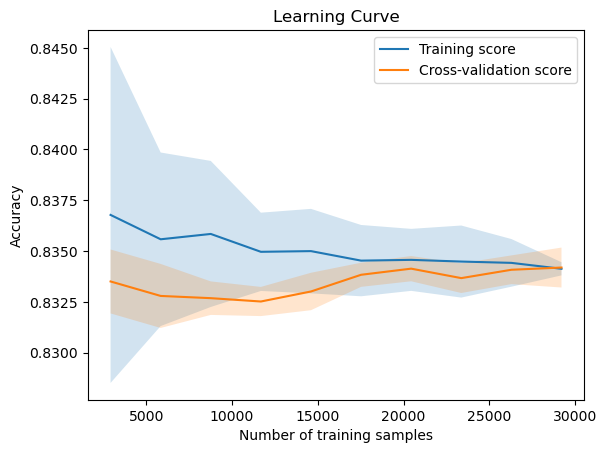

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Set up the logistic regression model and parameters
lr_model = LogisticRegression(C=0.3, penalty='none', random_state=112)

# Use the learning_curve function to generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(lr_model, X_train_val, y_train_val, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=random_state)

# Calculate the mean and standard deviation of the training and test scores at each training size
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Add labels and legend
plt.title('Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Show the plot
plt.show()


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


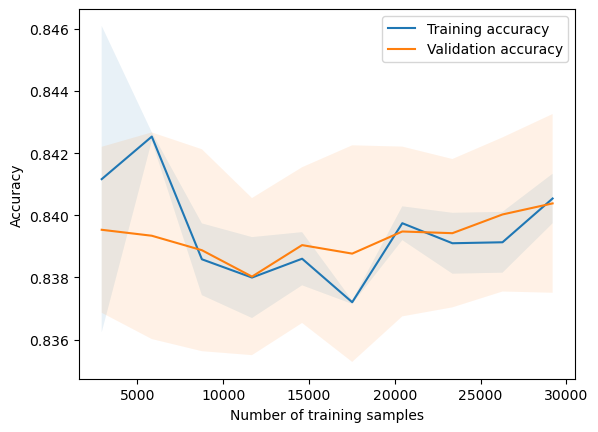

[CV] END ...............................C=0.01, penalty=none; total time=   1.2s
[CV] END ...............................C=0.01, penalty=none; total time=   1.3s
[CV] END .................................C=0.01, penalty=l2; total time=   0.6s
[CV] END .................................C=0.01, penalty=l2; total time=   0.6s
[CV] END .................................C=0.01, penalty=l2; total time=   0.6s
[CV] END ...............................C=0.05, penalty=none; total time=   1.2s
[CV] END ...............................C=0.05, penalty=none; total time=   1.3s
[CV] END ...............................C=0.05, penalty=none; total time=   1.3s
[CV] END .................................C=0.05, penalty=l2; total time=   0.9s
[CV] END .................................C=0.05, penalty=l2; total time=   1.5s
[CV] END ................................C=0.1, penalty=none; total time=   1.6s
[CV] END ................................C=0.1, penalty=none; total time=   1.3s
[CV] END ...................

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model_lr, X=X_train_val, y=y_train_val, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Validation accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


We notice that the curve of the validation accuracy increases and training accuracy decreases. There is also an intersection between theses two curves in the 30000 training samples, it may cause overfitting but it stopped before.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


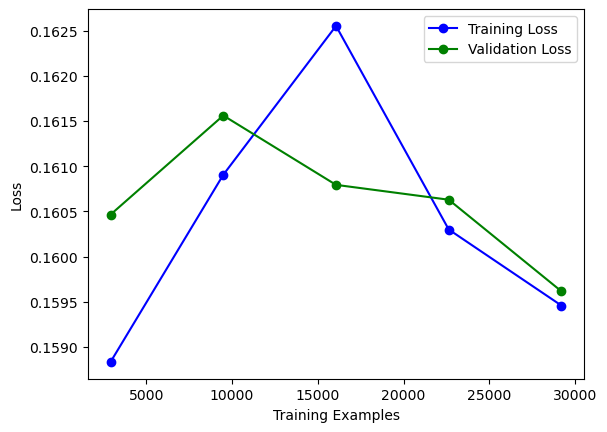

In [119]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model_lr, X_train_val, y_train_val, cv=5, n_jobs=-1)
train_loss = 1 - train_scores.mean(axis=1)
test_loss = 1 - test_scores.mean(axis=1)

plt.plot(train_sizes, train_loss, 'o-', color="b", label="Training Loss")
plt.plot(train_sizes, test_loss, 'o-', color="g", label="Validation Loss")

plt.xlabel("Training Examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()


It is not unusual for the training loss to initially increase during the early stages of training. This is because the model is trying to fit to the training data and may initially overfit, which can cause the training loss to increase. As training continues, the model may learn to generalize better to the data, resulting in a decrease in the training loss.

However, if the training loss continues to increase and does not decrease at a later stage of training, it may indicate that the model is not learning well and may require adjustments to the model architecture or training parameters, but it's not our case because the training loss decrease and the same thing for the validation loss, so we conculure that there's no an overfitting.

In [125]:
Data.columns

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness',
       ...
       'column_name_99', 'column_name_100', 'column_name_101',
       'column_name_102', 'column_name_103', 'column_name_104',
       'column_name_105', 'column_name_106', 'column_name_107',
       'column_name_108'],
      dtype='object', length=124)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


<AxesSubplot:>

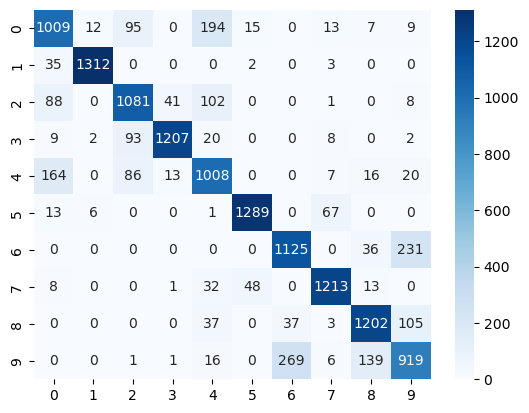

In [120]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred=y_pred_lr)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')


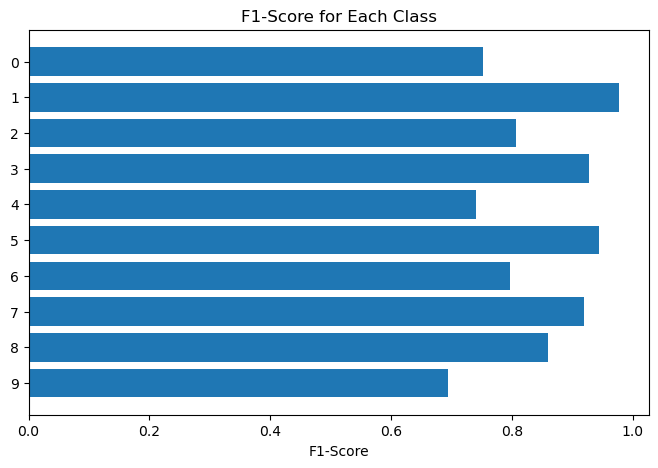

In [121]:
# Print classification report
report = classification_report(y_test, y_pred_lr, output_dict=True)

# Extract f1-score for each class
class_names = list(report.keys())[0:-3]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
y_pos = np.arange(len(class_names))
ax.barh(y_pos, f1_scores, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(class_names)
ax.invert_yaxis()
ax.set_xlabel('F1-Score')
ax.set_title('F1-Score for Each Class')
plt.show()


### **K-NN**

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()

In [131]:
#Cross-Validated Grid Search
knnc_parameters = {'n_neighbors' : [2,3,4,5,6,7,8],
              'weights' : ['uniform','distance'],
              'algorithm' : ['auto','ball_tree','kd_tree','brute'],
              'leaf_size' : [25,30,35]
             }
knnc_gscv = GridSearchCV(knnc, knnc_parameters, cv=5, n_jobs=-1 ,verbose=2,error_score='raise')
#Fit GSCV
knnc_gscv.fit(X_train,y_train.values.ravel())
#Get best estimator
knnc_best_model = knnc_gscv.best_estimator_
print('The best estimator is : ', knnc_best_model)



Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] END algorithm=auto, leaf_size=25, n_neighbors=2, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, leaf_size=25, n_neighbors=2, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, leaf_size=25, n_neighbors=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=25, n_neighbors=3, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, leaf_size=25, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END algorithm=auto, leaf_size=25, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=25, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=25, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=25, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=25, n_neighbors=4, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, leaf_siz

In [132]:
# Use the best model to make predictions on the testing set
knnc_best_model = knnc_gscv.best_estimator_
y_pred_knnc = knnc_best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred=y_pred_knnc))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1354
           1       0.99      0.99      0.99      1352
           2       0.80      0.80      0.80      1321
           3       0.97      0.91      0.94      1341
           4       0.73      0.80      0.77      1314
           5       0.95      0.94      0.95      1376
           6       0.78      0.81      0.80      1392
           7       0.93      0.94      0.93      1315
           8       0.85      0.87      0.86      1384
           9       0.73      0.69      0.71      1351

    accuracy                           0.85     13500
   macro avg       0.85      0.85      0.85     13500
weighted avg       0.85      0.85      0.85     13500



<AxesSubplot:>

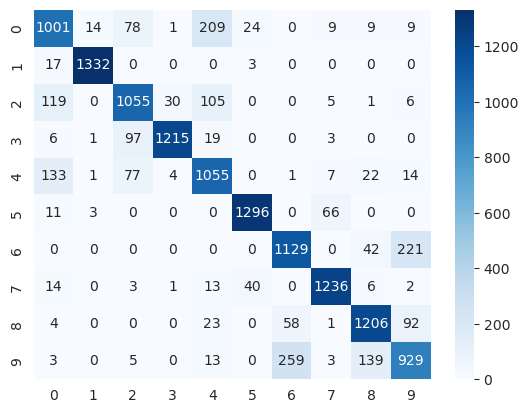

In [134]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred=y_pred_knnc)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')


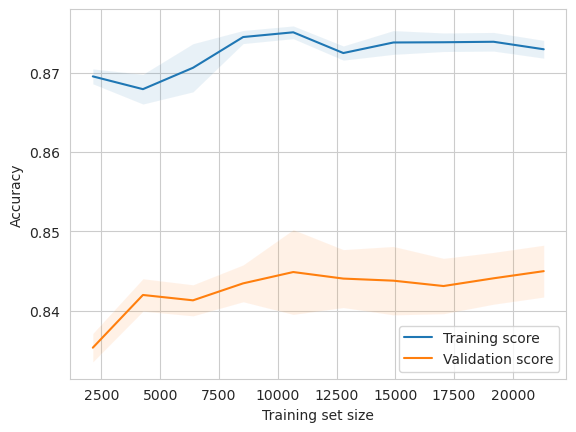

In [139]:
train_sizes, train_scores, val_scores = learning_curve(
    knnc_best_model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='accuracy'
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


Based on the scores, it does not necessarily indicate that there is overfitting. Generally, overfitting occurs when the training score is significantly higher than the validation score. However, a difference of 0.03 between the training score and validation score is not necessarily indicative of overfitting.

To determine if there is overfitting, it is important to look at the trend of the scores as the size of the training set increases. If the training score continues to increase while the validation score plateaus or decreases, then there may be overfitting. If both scores continue to increase or plateau together, then there may not be overfitting.

### **Decision Tree Classifier**

In [140]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = random_state)

In [141]:
#Cross-Validated Grid Search
dtc_parameters = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [3,4,5,6],
              'min_samples_leaf' : [1,2,3,4,5,6],
              'min_samples_split' : [2,3,4,5],
              'max_features' : ['sqrt','log2',None]
             }
dtc_gscv = GridSearchCV(dtc, dtc_parameters, cv=5, n_jobs=-1 ,verbose=2,error_score='raise')
#Fit GSCV
dtc_gscv.fit(X_train,y_train.values.ravel())
#Get best estimator
dtc_best_model = dtc_gscv.best_estimator_
print('The best estimator is : ', dtc_best_model)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s


In [142]:
# Use the best model to make predictions on the testing set
dtc_best_model = dtc_gscv.best_estimator_
y_pred_dtc = dtc_best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred=y_pred_dtc))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1354
           1       0.93      0.97      0.95      1352
           2       0.82      0.69      0.75      1321
           3       0.98      0.86      0.91      1341
           4       0.55      0.80      0.65      1314
           5       0.97      0.90      0.94      1376
           6       0.73      0.76      0.75      1392
           7       0.93      0.91      0.92      1315
           8       0.82      0.83      0.83      1384
           9       0.67      0.61      0.64      1351

    accuracy                           0.80     13500
   macro avg       0.81      0.80      0.80     13500
weighted avg       0.81      0.80      0.80     13500



<AxesSubplot:>

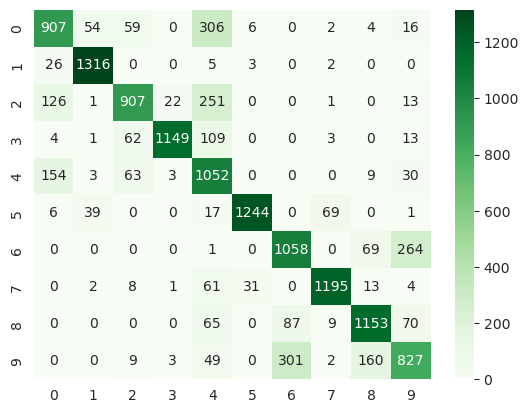

In [143]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred=y_pred_dtc)
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens')


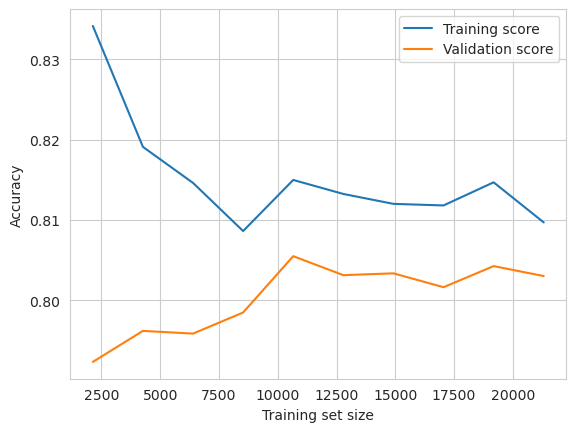

In [145]:
train_sizes, train_scores, val_scores = learning_curve(dtc_best_model, X_train, y_train.values.ravel(), cv=5, 
                                                        scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### **Random Forest Classifier**

In [146]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = random_state)

In [157]:
from sklearn.model_selection import cross_val_score

# Specify hyperparameters
criterion = 'entropy'
bootstrap = 'True'
max_depth = 50
max_features = 'auto'
min_samples_leaf = 4
min_samples_split =10
n_estimators = 400

# Initialize model with specified hyperparameters
rfc = RandomForestClassifier(n_estimators=n_estimators,
                              bootstrap=bootstrap,
                              criterion=criterion,
                              max_depth=max_depth,
                              min_samples_leaf=min_samples_leaf,
                              min_samples_split=min_samples_split,
                              max_features=max_features)
# Perform 10-fold cross-validation and compute the mean score
cv_scores = cross_val_score(rfc, X_train_val, y_train_val, cv=5)
mean_cv_score = cv_scores.mean()

# Print the mean cross-validation score
print("Mean CV score:", mean_cv_score)


# Fit model to training data
rfc.fit(X_train, y_train.values.ravel())



Mean CV score: 0.8543013698630137


RandomForestClassifier(bootstrap='True', criterion='entropy', max_depth=50,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      1354
           1       0.99      0.99      0.99      1352
           2       0.81      0.81      0.81      1321
           3       0.97      0.91      0.94      1341
           4       0.72      0.84      0.78      1314
           5       0.96      0.94      0.95      1376
           6       0.82      0.79      0.80      1392
           7       0.92      0.96      0.94      1315
           8       0.86      0.88      0.87      1384
           9       0.72      0.75      0.73      1351

    accuracy                           0.86     13500
   macro avg       0.86      0.86      0.86     13500
weighted avg       0.86      0.86      0.86     13500



<AxesSubplot:>

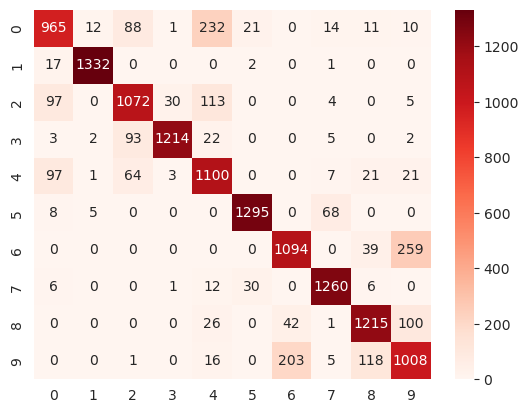

In [158]:
# Use the best model to make predictions on the testing set
y_pred_rfc = rfc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred=y_pred_rfc))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred=y_pred_rfc)
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')

[learning_curve] Training set sizes: [ 2920  5840  8760 11680 14600 17520 20440 23360 26280 29200]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.9min finished


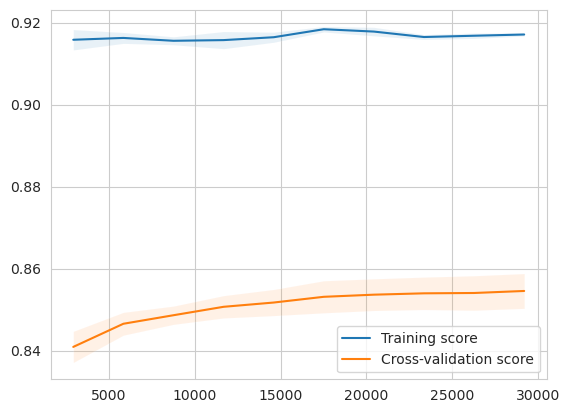

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rfc, X_train_val, y_train_val, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend()
plt.show()


In [ ]:
A training score of 0.92 and a cross-validation score of 0.84 suggest that the model is doing reasonably well. It seems that the model is not overfitting too much.

In [150]:
import pandas as pd
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Compare the models based on evaluation metrics
models = ['KNN', 'Random Forest', 'Logistic Regression', 'Decision Tree']
accuracy = [accuracy_score(y_test, y_pred_knnc), accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dtc)]
precision = [precision_score(y_test, y_pred_knnc, average='macro'), precision_score(y_test, y_pred_rfc, average='macro'), precision_score(y_test, y_pred_lr, average='macro'), precision_score(y_test, y_pred_dtc, average='macro')]
recall = [recall_score(y_test, y_pred_knnc, average='macro'), recall_score(y_test, y_pred_rfc, average='macro'), recall_score(y_test, y_pred_lr, average='macro'), recall_score(y_test, y_pred_dtc, average='macro')]
f1_score = [f1_score(y_test, y_pred_knnc, average='macro'), f1_score(y_test, y_pred_rfc, average='macro'), f1_score(y_test, y_pred_lr, average='macro'), f1_score(y_test, y_pred_dtc, average='macro')]

# Create a dataframe to display the evaluation metrics
results_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1_score})

# Print the evaluation metrics as a table
print(results_df)
print()

# Select the best model based on the evaluation metrics
best_model = models[np.argmax(accuracy)]
print('The best model is:', best_model)


                 Model  Accuracy  Precision    Recall  F1-score
0                  KNN  0.848444   0.849539  0.848394  0.848561
1        Random Forest  0.855704   0.857885  0.855894  0.855979
2  Logistic Regression  0.841852   0.843095  0.841726  0.842144
3        Decision Tree  0.800593   0.813287  0.800538  0.803092

The best model is: Random Forest


##### Let's move with the Random forest model


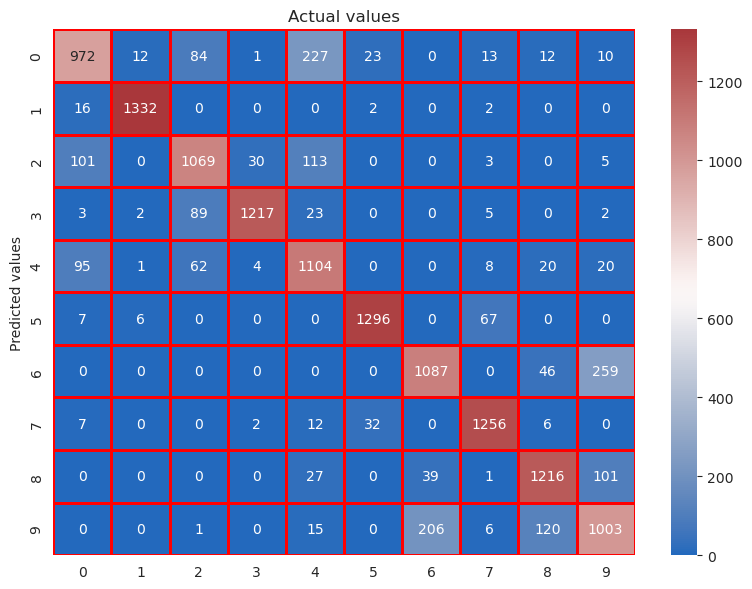

In [151]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = rfc.classes_,
    yticklabels = rfc.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

Properly classified samples are shown on the diagonal, noted the squares colored in red. It could be seen that True Positives (i.e., correct predictions) prevail. Wrong guessings are located below and above the diagonal. 

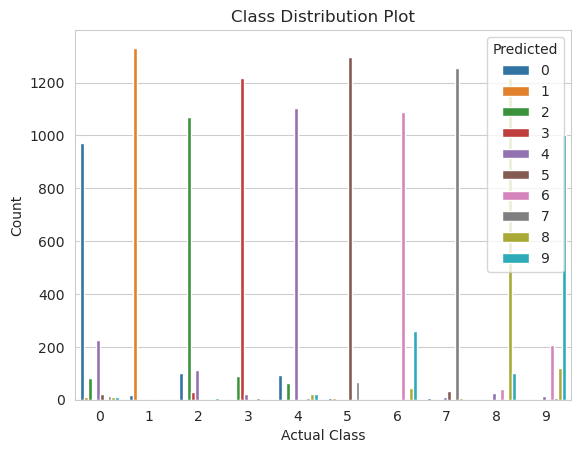

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred_rfc = rfc.predict(X_test)

# Create a dataframe with actual and predicted class labels
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfc})

# Create a countplot to visualize the class distribution
sns.countplot(data=df, x='Actual', hue='Predicted')
plt.title('Class Distribution Plot')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.show()


92% AUC is quite a good result. This shows that many samples were properly predicted. Curves positioned to the top-left corner suggest a really well performing model.

In [ ]:
#!pip install scikit-plot
